# Visualize

In [1]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import scipy.io as sio

In [2]:
mat = sio.loadmat('data_1/ex7data1.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
data1 = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data1.head()

,X1,X2
0,3.381563,3.389113
1,4.527875,5.854178
2,2.655682,4.411995
3,2.765235,3.715414
4,2.846560,4.175506


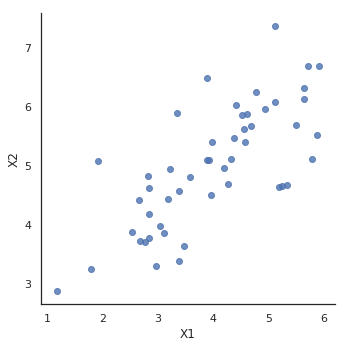

In [4]:
sns.set(context="notebook", style="white")
sns.lmplot('X1', 'X2', data=data1, fit_reg=False)

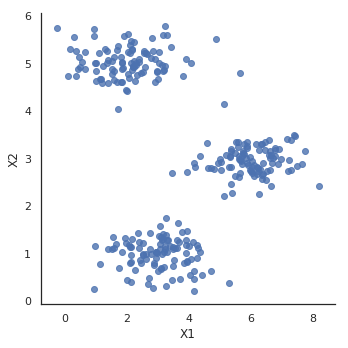

In [5]:
mat = sio.loadmat('data_1/ex7data2.mat')
data2 = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data2.head()

sns.lmplot('X1', 'X2', data=data2, fit_reg=False)

# 2D Kmeabs

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import scipy.io as sio

import sys
sys.path.append('..')

from helper import kmeans as km

         X1        X2
0  1.842080  4.607572
1  5.658583  4.799964
2  6.352579  3.290854
3  2.904017  4.612204
4  3.231979  4.939894


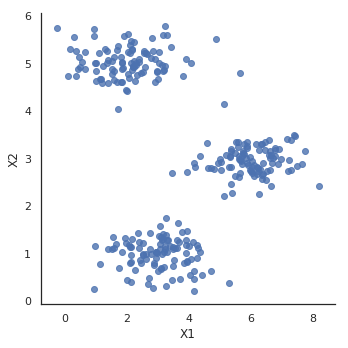

In [7]:
mat = sio.loadmat('data_1/ex7data2.mat')
data2 = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
print(data2.head())

sns.set(context="notebook", style="white")
sns.lmplot('X1', 'X2', data=data2, fit_reg=False)

# random init¶

for initial centroids


/media/singhals/hdd/My Implementation/Coursera-ML-AndrewNg-master/helper/kmeans.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return data.sample(k).as_matrix()


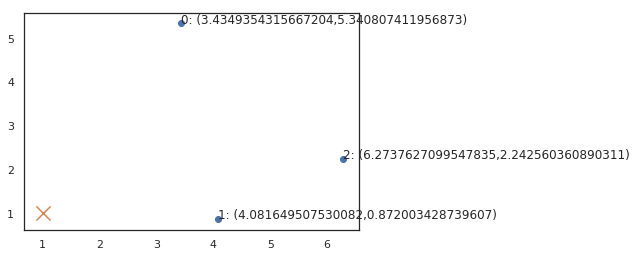

In [8]:
km.random_init(data2, 3)
init_centroids = km.random_init(data2, 3)
init_centroids
x = np.array([1, 1])
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x=init_centroids[:, 0], y=init_centroids[:, 1])
for i, node in enumerate(init_centroids):
    ax.annotate('{}: ({},{})'.format(i, node[0], node[1]), node)
ax.scatter(x[0], x[1], marker='x', s=200)

In [9]:
km._find_your_cluster(x, init_centroids)

1

In [10]:
C = km.assign_cluster(data2, init_centroids)
data_with_c = km.combine_data_C(data2, C)
data_with_c.head()

/media/singhals/hdd/My Implementation/Coursera-ML-AndrewNg-master/helper/kmeans.py:51: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  arr=data.as_matrix())


,X1,X2,C
0,1.842080,4.607572,0
1,5.658583,4.799964,0
2,6.352579,3.290854,2
3,2.904017,4.612204,0
4,3.231979,4.939894,0


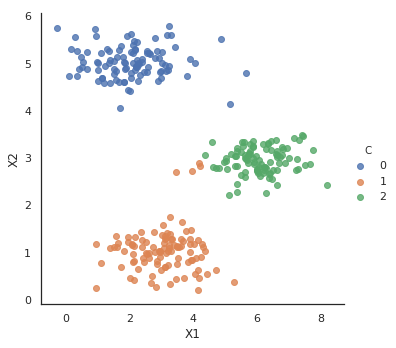

In [11]:
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)

In [12]:
km.new_centroids(data2, C)

/media/singhals/hdd/My Implementation/Coursera-ML-AndrewNg-master/helper/kmeans.py:60: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  drop('C', axis=1).\


array([[2.05132113, 5.01925539],
       [3.06584667, 1.05078048],
       [6.0976967 , 2.94636078]])

/media/singhals/hdd/My Implementation/Coursera-ML-AndrewNg-master/helper/kmeans.py:71: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  arr=data.as_matrix() - expand_C_with_centroids)


running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 6
running epoch 7


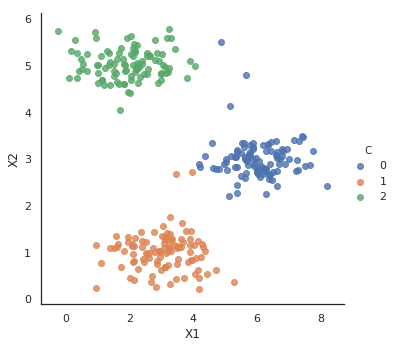

In [13]:

final_C, final_centroid, _= km._k_means_iter(data2, 3)
data_with_c = km.combine_data_C(data2, final_C)
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)

In [14]:
km.cost(data2, final_centroid, final_C)

0.794176363371587

running epoch 0
running epoch 1
running epoch 2
running epoch 0
running epoch 1
running epoch 2
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 6
running epoch 7
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 6
running epoch 7
running epoch 8
running epoch 0
running epoch 1
running epoch 2
running epoch 0
running epoch 1
running epoch 2
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4


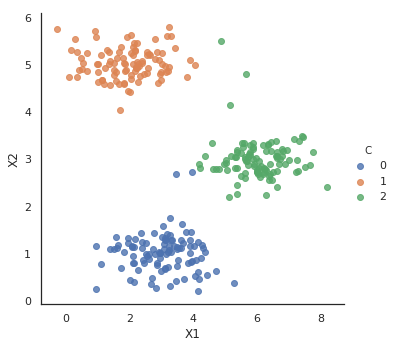

In [15]:
best_C, best_centroids, least_cost = km.k_means(data2, 3)

least_cost
data_with_c = km.combine_data_C(data2, best_C)
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)

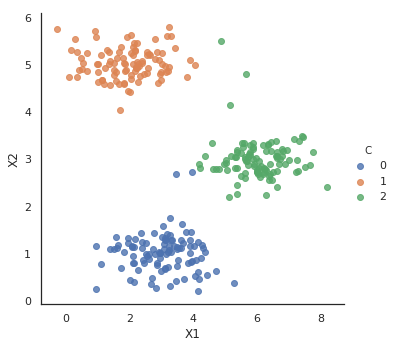

In [16]:

from sklearn.cluster import KMeans

sk_kmeans = KMeans(n_clusters=3)

sk_kmeans.fit(data2)

sk_C = sk_kmeans.predict(data2)

data_with_c = km.combine_data_C(data2, sk_C)

sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)


# kmeans for image compression

In [17]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import sys
sys.path.append('..')

from helper import kmeans as km

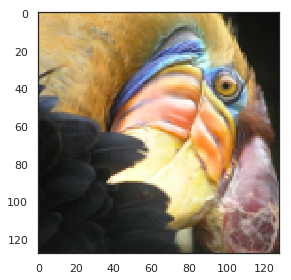

In [18]:
from skimage import io

# cast to float, you need to do this otherwise the color would be weird after clustring
pic = io.imread('data_1/bird_small.png') / 255.
io.imshow(pic)

In [19]:
pic.shape

(128, 128, 3)

In [20]:
# serialize data
data = pic.reshape(128*128, 3)

In [21]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=16, n_init=100, n_jobs=-1)

In [22]:
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=100, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
centroids = model.cluster_centers_
print(centroids.shape)

C = model.predict(data)
print(C.shape)

(16, 3)
(16384,)


In [24]:
centroids[C].shape

(16384, 3)

In [25]:
compressed_pic = centroids[C].reshape((128,128,3))

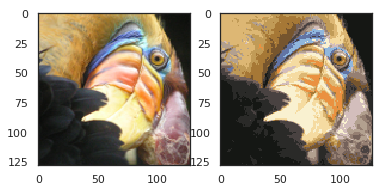

In [26]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(pic)
ax[1].imshow(compressed_pic)

# 2d PCA

In [27]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="white")

import numpy as np
import pandas as pd
import scipy.io as sio

import sys
sys.path.append('..')

from helper import general
from helper import pca

(50, 2)


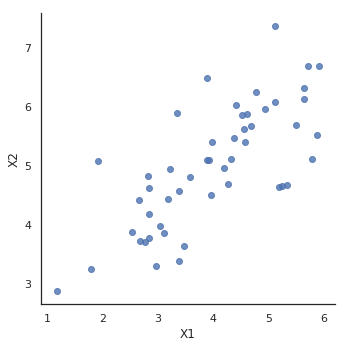

In [28]:
mat = sio.loadmat('data_1/ex7data1.mat')
X = mat.get('X')

# visualize raw data
print(X.shape)

sns.lmplot('X1', 'X2', 
           data=pd.DataFrame(X, columns=['X1', 'X2']),
           fit_reg=False)

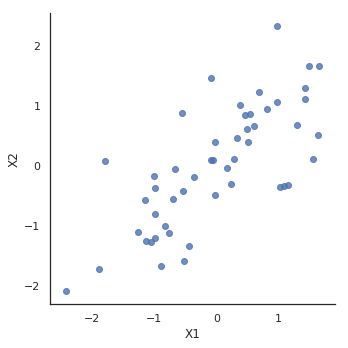

In [29]:
X_norm = pca.normalize(X)

sns.lmplot('X1', 'X2', 
           data=pd.DataFrame(X_norm, columns=['X1', 'X2']),
           fit_reg=False)

## covariance matrix $\Sigma$
<img style="float: left;" src="img/cov_mat.png">

In [30]:
Sigma = pca.covariance_matrix(X_norm)  # capital greek Sigma
Sigma  # (n, n)

array([[1.        , 0.73553038],
       [0.73553038, 1.        ]])

Text(0.5, 1.0, 'Z dimension')

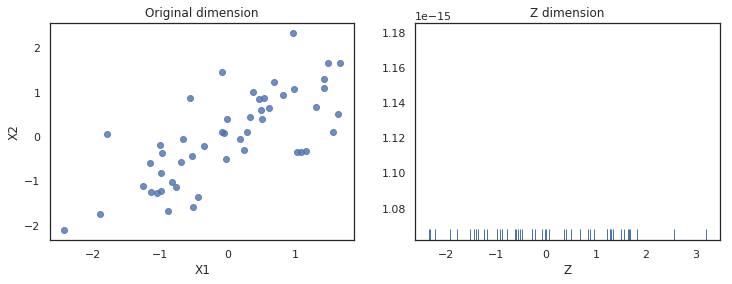

In [31]:
U, S, V = pca.pca(X_norm)
u1 = U[0]
Z = pca.project_data(X_norm, U, 1)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
sns.regplot('X1', 'X2', 
           data=pd.DataFrame(X_norm, columns=['X1', 'X2']),
           fit_reg=False,
           ax=ax1)
ax1.set_title('Original dimension')

sns.rugplot(Z, ax=ax2)
ax2.set_xlabel('Z')
ax2.set_title('Z dimension')

Text(0.5, 1.0, 'Original dimension')

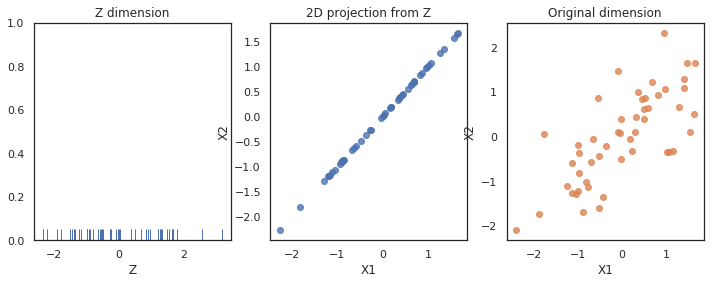

In [32]:
X_recover = pca.recover_data(Z, U)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 4))

sns.rugplot(Z, ax=ax1)
ax1.set_title('Z dimension')
ax1.set_xlabel('Z')

sns.regplot('X1', 'X2', 
           data=pd.DataFrame(X_recover, columns=['X1', 'X2']),
           fit_reg=False,
           ax=ax2)
ax2.set_title("2D projection from Z")

sns.regplot('X1', 'X2', 
           data=pd.DataFrame(X_norm, columns=['X1', 'X2']),
           fit_reg=False,
           ax=ax3)
ax3.set_title('Original dimension')

In [33]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="white")
import numpy as np
import pandas as pd
import scipy.io as sio
import sys
sys.path.append('..')
from helper import general
from helper import pca
mat = sio.loadmat('data_1/ex7faces.mat')
mat.keys()
X = np.array([x.reshape((32, 32)).T.reshape(1024) for x in mat.get('X')])
X.shape


(5000, 1024)

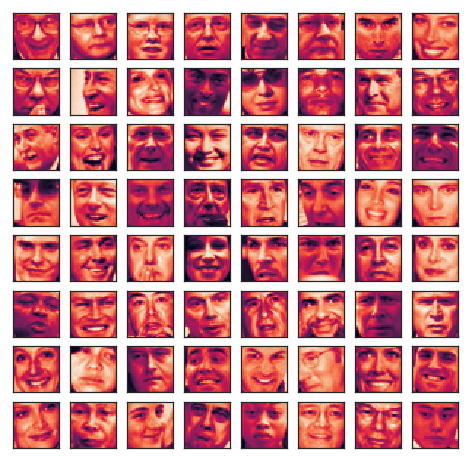

In [34]:
pca.plot_n_image(X, n=64)


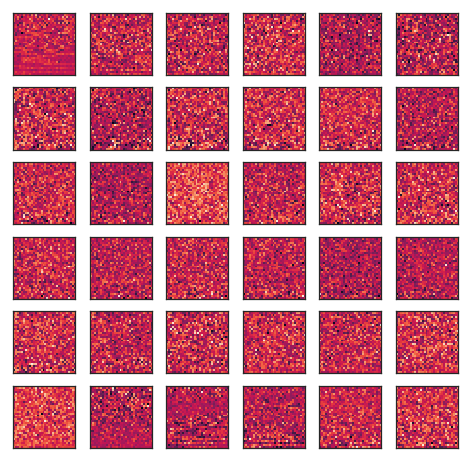

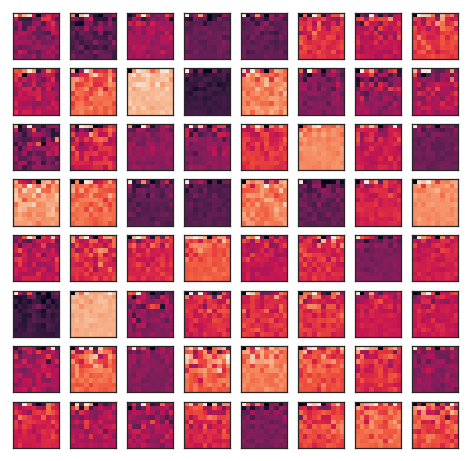

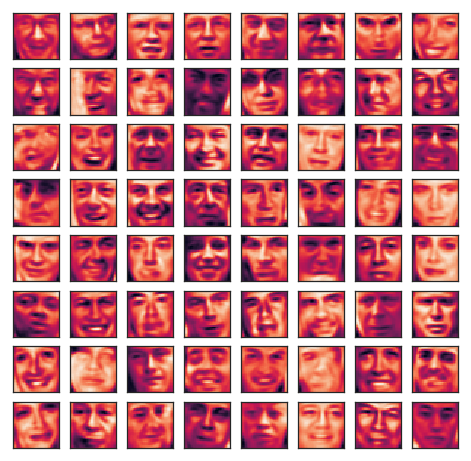

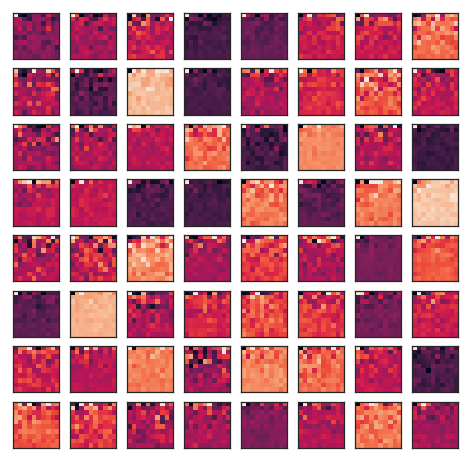

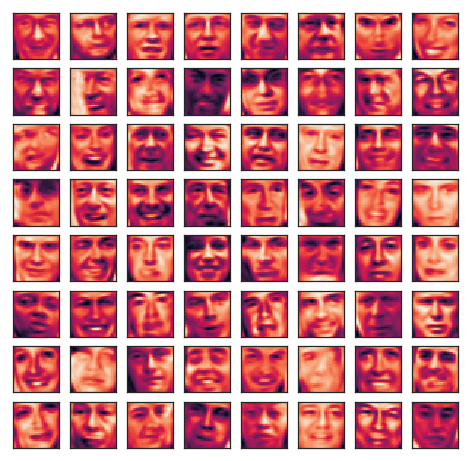

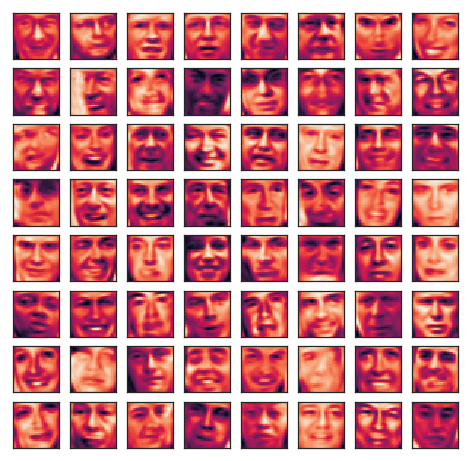

In [35]:
U, _, _ = pca.pca(X)
U.shape

# didn't see face in principle components 
pca.plot_n_image(U, n=36)


# no face in projected dimension too
Z = pca.project_data(X, U, k=100)
pca.plot_n_image(Z, n=64)


#
X_recover = pca.recover_data(Z, U)
pca.plot_n_image(X_recover, n=64)

from sklearn.decomposition import PCA

sk_pca = PCA(n_components=100)

Z = sk_pca.fit_transform(X)
Z.shape

pca.plot_n_image(Z, 64)

X_recover = sk_pca.inverse_transform(Z)
X_recover.shape
pca.plot_n_image(X_recover, n=64)
pca.plot_n_image(X_recover, n=64)
